In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality

        Code from https://gist.github.com/craffel/2d727968c3aaebd10359
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

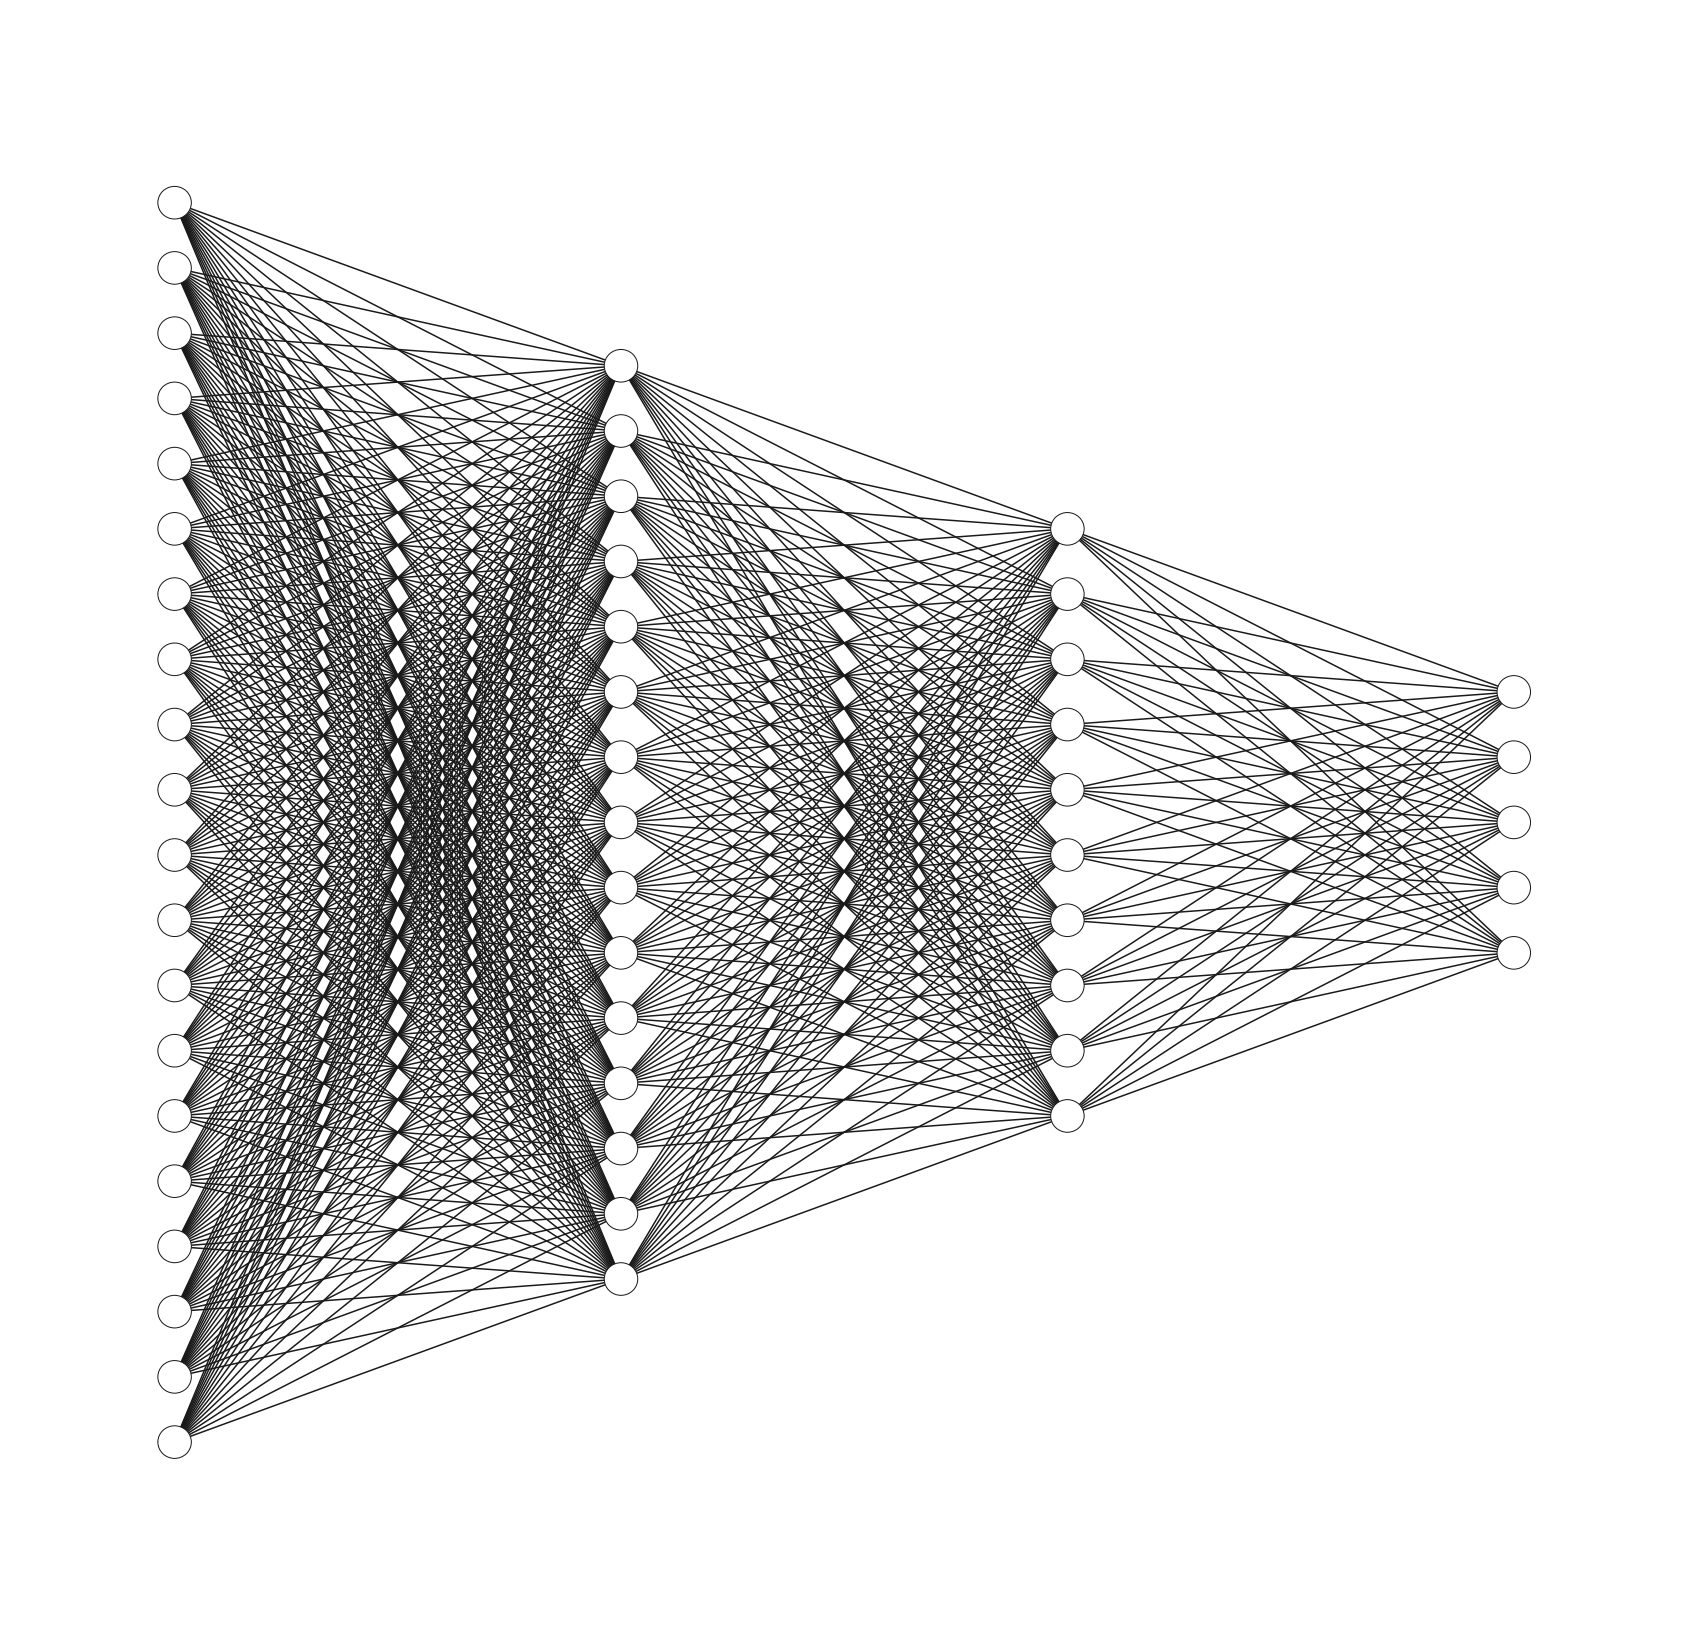

In [6]:
fig = plt.figure(figsize=(30, 30))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [20, 15, 10, 5])

In [0]:
def activate_sigmoid(x):
  return 1 / (1 + np.exp(-x))

def predict(x, w1, w2):
  return (feedforward(x,w1, w2) > 0.5).astype('int')[:,0]

def loss_cross_entropy(y_star, y):
  return np.sum( y_train * np.log(1e-15 + prediction) )

def loss(y_star, y):
  return np.sum(np.power(y_star - y, 2)) * (1/y.shape[0])

def feedforward(x, w1, w2):
  h = activate_sigmoid(np.matmul(x, w1))
  return activate_sigmoid(np.matmul(h, w2))

def update_w(x, y, w1, w2, learning_rate=0.001):
  y_feed = feedforward(x, w1, w2).reshape((x.shape[0], ))

  out_delta = (y_feed - y) * y_feed * (1-y_feed)

  h = activate_sigmoid(np.matmul(x, w1))
  
  w2_d = np.matmul(h.T, out_delta)

  out_delta = out_delta.reshape((out_delta.shape[0], 1))

  hidden_delta = np.matmul(out_delta, w2.T) * h * (1-h)
  w1_d = np.matmul(x.T, hidden_delta)

  wo1 = w1 - learning_rate * w1_d
  wo2 = w2 - learning_rate * w2_d.reshape((w2_d.shape[0], 1))

  return wo1, wo2

In [0]:
N = 1000

s = -np.pi/1.5
e = np.pi/1.5

x1 = [np.sin(np.linspace(s, e, N)), np.cos(np.linspace(s, e, N))]
x2 = [np.sin(np.linspace(s, e, N)), -np.cos(np.linspace(s, e, N))]

x1 = np.array(x1).T
x2 = np.array(x2).T

x1[:,0] -= 0.5
x2[:,0] += 0.5

x1[:,1] += 0.1
x2[:,1] -= 0.1

x1 += np.random.randn(x1.shape[0], x1.shape[1]) * 0.1
x2 += np.random.randn(x2.shape[0], x2.shape[1]) * 0.1

x = np.concatenate([x1, x2], axis=0)
y = np.concatenate([np.zeros((x1.shape[0],)), np.ones((x2.shape[0],))])

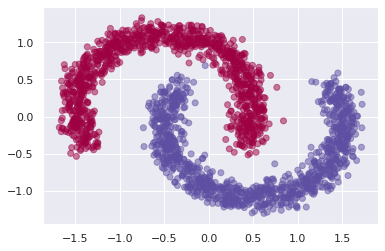

In [0]:
plt.scatter(x[:,0], x[:,1], c=y, alpha=0.5, cmap='Spectral')

In [0]:
shuffle_idx = np.arange(x.shape[0])
np.random.shuffle(shuffle_idx)

x = x[shuffle_idx]
y = y[shuffle_idx]

xn = np.concatenate([np.ones((x.shape[0], 1)), x], axis=1)

TRAIN_RATIO = 0.7
N_TRAIN = int(x.shape[0]*TRAIN_RATIO)

x_train = xn[0:N_TRAIN, :]
y_train= y[0:N_TRAIN]

x_test = xn[N_TRAIN:,:]
y_test = y[N_TRAIN:]

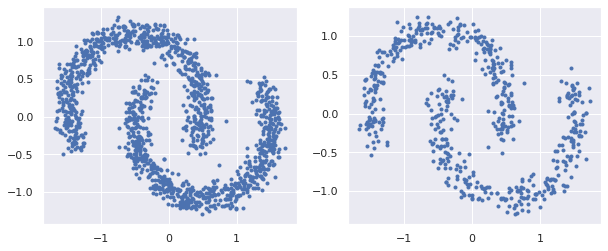

In [0]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(x_train[:,1], x_train[:, 2], '.')
plt.subplot(1,2,2)
plt.plot(x_test[:,1], x_test[:, 2], '.')

In [0]:
N_HIDDEN = 3

w1 = np.random.randn(xn.shape[1], N_HIDDEN)
w2 = np.random.randn(N_HIDDEN, 1)

learning_rate = 0.01

w1_list = []
w2_list = []
loss_list = []

for i in range(2000):
  prediction = predict(x_train, w1, w2)

  loss_list.append( loss_cross_entropy(prediction, y_train) )
  w1_list.append(w1)
  w2_list.append(w2)

  w1, w2 = update_w(x_train, y_train, w1, w2, learning_rate=learning_rate)

print('Train Accuracy %.2f'% (1-loss(prediction, y_train)))
print('Test Accuracy %.2f'% (1-loss(predict(x_test,w1, w2), y_test)))

w1_list = np.array(w1_list)
w2_list = np.array(w2_list)
loss_list = np.array(loss_list)

w1_list = w1_list.reshape((w1_list.shape[0], w1_list.shape[1]*w1_list.shape[2]))
w2_list = w2_list.reshape((w2_list.shape[0], w2_list.shape[1]*w2_list.shape[2]))

Train Accuracy 1.00
Test Accuracy 1.00


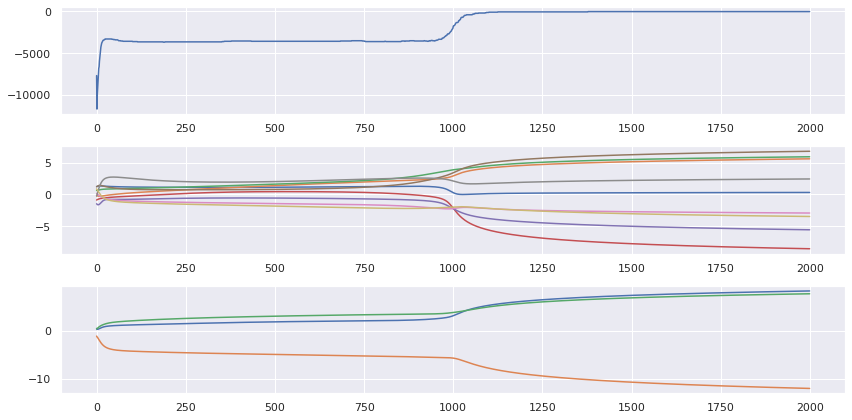

In [0]:
plt.figure(figsize=((12,6)))
plt.subplot(3,1,1)
plt.plot(loss_list)
plt.subplot(3,1,2)
plt.plot(w1_list)
plt.subplot(3,1,3)
plt.plot(w2_list)

plt.tight_layout()

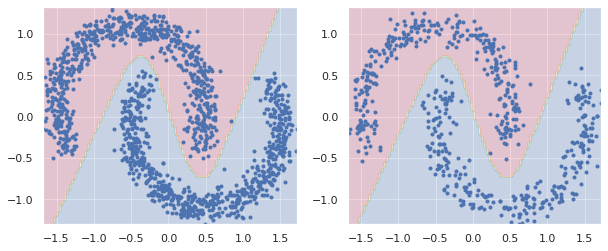

In [0]:
mesh_x, mesh_y = np.meshgrid(np.linspace(xn[:,1].min(), xn[:,1].max(), 100), 
                             np.linspace(xn[:,2].min(), xn[:,2].max(), 100))

xg = np.array([np.ones((mesh_x.shape[0] * mesh_x.shape[0])), 
          mesh_x.ravel(),
          mesh_y.ravel()]).T

z = predict(xg, w1, w2)
z = z.reshape(mesh_x.shape)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(x_train[:,1], x_train[:, 2], '.')
plt.contourf(mesh_x, mesh_y, z, cmap='Spectral', alpha=0.2)

plt.subplot(1,2,2)
plt.plot(x_test[:,1], x_test[:, 2], '.')
plt.contourf(mesh_x, mesh_y, z, cmap='Spectral', alpha=0.2)
